# Preprocessing, Training, and Modeling 

In [54]:
#importing modules 

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

In [2]:
# loading into the dataframe 

df = pd.read_csv('preprocessing.csv')
df.head()

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre,Publisher,platforms,Years_of_Release,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,Wii Sports,41.36,28.96,3.77,8.45,82.54,Sports,Nintendo,1,11.0,...,0,0,0,0,0,0,0,0,1,0
1,Grand Theft Auto V,24.13,24.14,1.43,8.04,57.75,Action,Take-Two Interactive,7,3.0,...,0,0,0,0,0,0,0,0,0,0
2,Super Mario Bros.,32.48,4.88,6.96,0.99,45.31,Platform,Nintendo,8,25.0,...,0,0,1,0,0,0,0,0,0,0
3,Mario Kart Wii,15.68,12.80,3.79,3.29,35.57,Racing,Nintendo,1,9.0,...,0,0,0,0,1,0,0,0,0,0
4,Wii Sports Resort,15.61,10.95,3.28,2.95,32.78,Sports,Nintendo,1,8.0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
df.columns

Index(['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Genre', 'Publisher', 'platforms', 'Years_of_Release',
       'Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object')

# Multiple Linear Regression Model 

In [4]:
# defining variables 

X0 = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','platforms', 'Years_of_Release',
       'Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']]
X1 = df[['EU_Sales', 'JP_Sales', 'Other_Sales', 'platforms', 'Years_of_Release',
       'Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']]
X2 = df[['NA_Sales', 'JP_Sales', 'Other_Sales', 'platforms', 'Years_of_Release',
       'Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']]
X3 = df[['EU_Sales', 'NA_Sales', 'Other_Sales', 'platforms', 'Years_of_Release',
       'Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']]
X4 = df[['EU_Sales', 'NA_Sales', 'JP_Sales', 'platforms', 'Years_of_Release',
       'Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']]

y0 = df['Global_Sales']
y1 = df['NA_Sales']
y2 = df['EU_Sales']
y3 = df['JP_Sales']
y4 = df['Other_Sales']

In [5]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size = 0.3, random_state=2)
print(X0_train.shape, y0_train.shape, X0_test.shape, y0_test.shape)

(4367, 18) (4367,) (1872, 18) (1872,)


In [56]:
lr = LinearRegression()
pipe = make_pipeline(StandardScaler(), LinearRegression())
model0 = pipe.fit(X0_train, y0_train)
y0_pred = model0.predict(X0_test)

model0.score(X0_train, y0_train)

0.9999939719943663

Text(0.5, 0, 'Actual Global Sales')

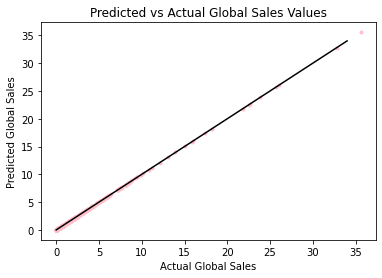

In [57]:
plt.plot(y0_test, y0_pred, '.', color='pink')
plt.plot([x for x in range(0,35)],[x for x in range(0,35)], color='black')

plt.title('Predicted vs Actual Global Sales Values')
plt.ylabel('Predicted Global Sales')
plt.xlabel('Actual Global Sales')


In [59]:
print('Coefficients: \n', pipe['linearregression'].coef_)

Coefficients: 
 [1.55438874e+00 9.64237358e-01 3.88624538e-01 3.37790407e-01
 7.75888246e-05 1.97203138e-05 3.14987170e+10 2.01843847e+10
 1.82387289e+10 2.20574588e+10 1.90475828e+10 1.73824864e+10
 2.26065858e+10 2.60383289e+10 2.31646251e+10 2.06421467e+10
 2.60154807e+10 1.85749918e+10]


In [60]:
print('Mean squared error: %.2f'
      % mean_squared_error(y0_test, y0_pred))

Mean squared error: 0.00


In [61]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y0_test, y0_pred))

Mean absolute error: 0.00


In [62]:
X0_col = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','platforms', 'Years_of_Release',
       'Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']
coef = pipe['linearregression'].coef_

tuples = list(zip(X0_col, coef))
coef_df = pd.DataFrame(tuples, columns=['Features', 'Coefficients'])
coef_df

,Features,Coefficients
0,NA_Sales,1.554389e+00
1,EU_Sales,9.642374e-01
2,JP_Sales,3.886245e-01
3,Other_Sales,3.377904e-01
4,platforms,7.758882e-05
5,Years_of_Release,1.972031e-05
6,Action,3.149872e+10
7,Adventure,2.018438e+10
8,Fighting,1.823873e+10
9,Misc,2.205746e+10


## North America Sales 

In [12]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state=2)
print(X1_train.shape, y1_train.shape, X1_test.shape, y1_test.shape)

(4367, 17) (4367,) (1872, 17) (1872,)


In [63]:
modelNA = pipe.fit(X1_train, y1_train)
y1_pred = modelNA.predict(X1_test)

Text(0.5, 0, 'Actual North America Sales')

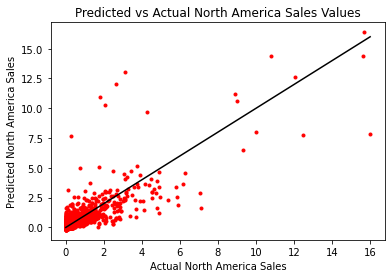

In [64]:
plt.plot(y1_test, y1_pred, '.', color='red')
plt.plot([x for x in range(0,17)],[x for x in range(0,17)], color='black')

plt.title('Predicted vs Actual North America Sales Values')
plt.ylabel('Predicted North America Sales')
plt.xlabel('Actual North America Sales')

In [65]:
r_sq = modelNA.score(X1,y1)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6687779883271243


The R-Squared coefficient tells us that this model explains about 67% variation from the mean. 

In [68]:
print('intercept:', modelNA['linearregression'].intercept_)

intercept: 0.5513833166692422


In [69]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y1_test, y1_pred))

Mean absolute error: 0.33


In [71]:
print('Coefficients:', modelNA['linearregression'].coef_)

Coefficients: [8.16075695e-01 1.95559885e-01 3.80940685e-01 9.91195280e-02
 9.72995104e-02 1.00207954e+13 6.42132789e+12 5.80234969e+12
 7.01721540e+12 6.05967315e+12 5.52995032e+12 7.19191105e+12
 8.28366331e+12 7.36944202e+12 6.56695728e+12 8.27639455e+12
 5.90932616e+12]


In [73]:
X1_col = ['EU_Sales', 'JP_Sales', 'Other_Sales', 'platforms', 'Years_of_Release',
       'Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']
coef = modelNA['linearregression'].coef_

tuples = list(zip(X1_col, coef))
coef_df = pd.DataFrame(tuples, columns=['Features', 'Coefficients'])
coef_df

,Features,Coefficients
0,EU_Sales,8.160757e-01
1,JP_Sales,1.955599e-01
2,Other_Sales,3.809407e-01
3,platforms,9.911953e-02
4,Years_of_Release,9.729951e-02
5,Action,1.002080e+13
6,Adventure,6.421328e+12
7,Fighting,5.802350e+12
8,Misc,7.017215e+12
9,Platform,6.059673e+12


## Europe Sales

In [20]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state=2)
print(X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape)

(4367, 17) (4367,) (1872, 17) (1872,)


In [74]:
modelEU = pipe.fit(X2_train, y2_train)
y2_pred = modelEU.predict(X2_test)

Text(0.5, 0, 'Actual Europe Sales')

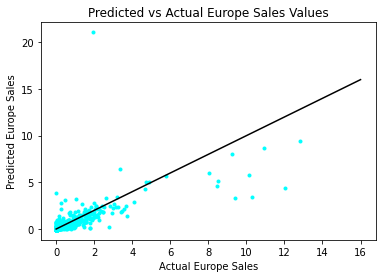

In [75]:
plt.plot(y2_test, y2_pred, '.', color='cyan')
plt.plot([x for x in range(0,17)],[x for x in range(0,17)], color='black')

plt.title('Predicted vs Actual Europe Sales Values')
plt.ylabel('Predicted Europe Sales')
plt.xlabel('Actual Europe Sales')

In [76]:
r_sq = modelEU.score(X2,y2)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7366237088609702


The R-Squared coefficient tells us that this model explains about 74% variation from the mean. 

In [77]:
print('intercept:', modelEU['linearregression'].intercept_)

intercept: 0.28488307162517496


In [78]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y2_test, y2_pred))

Mean absolute error: 0.15


In [79]:
print('slope:', modelEU['linearregression'].coef_)

slope: [ 2.95177023e-01  6.15265672e-02  5.96123696e-01  2.14119826e-02
 -2.38077836e-02 -1.46828129e+12 -9.40874973e+11 -8.50180165e+11
 -1.02818645e+12 -8.87884082e+11 -8.10267277e+11 -1.05378346e+12
 -1.21375074e+12 -1.07979591e+12 -9.62213091e+11 -1.21268570e+12
 -8.65854724e+11]


In [81]:
X2_col = ['NA_Sales', 'JP_Sales', 'Other_Sales', 'platforms', 'Years_of_Release',
       'Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']
coef = modelEU['linearregression'].coef_

tuples = list(zip(X2_col, coef))
coef_df = pd.DataFrame(tuples, columns=['Features', 'Coefficients'])
coef_df

,Features,Coefficients
0,NA_Sales,2.951770e-01
1,JP_Sales,6.152657e-02
2,Other_Sales,5.961237e-01
3,platforms,2.141198e-02
4,Years_of_Release,-2.380778e-02
5,Action,-1.468281e+12
6,Adventure,-9.408750e+11
7,Fighting,-8.501802e+11
8,Misc,-1.028186e+12
9,Platform,-8.878841e+11


## Japan Sales

In [82]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3, random_state=2)
print(X3_train.shape, y3_train.shape, X3_test.shape, y3_test.shape)

(4367, 17) (4367,) (1872, 17) (1872,)


In [84]:
modelJP = pipe.fit(X3_train, y3_train)
y3_pred = modelJP.predict(X3_test)

Text(0.5, 0, 'Actual Japan Sales')

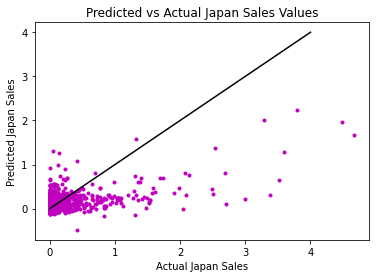

In [85]:
plt.plot(y3_test, y3_pred, '.', color='m')
plt.plot([x for x in range(0,5)],[x for x in range(0,5)], color='black')

plt.title('Predicted vs Actual Japan Sales Values')
plt.ylabel('Predicted Japan Sales')
plt.xlabel('Actual Japan Sales')

In [86]:
r_sq = modelJP.score(X3,y3)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.2387914570030002


The R-Squared coefficient tells us that this model explains about 24% variation from the mean. 

In [88]:
print('intercept:', modelJP['linearregression'].intercept_)

intercept: 0.10666717815848467


In [89]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y3_test, y3_pred))

Mean absolute error: 0.16


In [34]:
print('slope:', modelJP.coef_)

slope: [ 0.10726687  0.07694802 -0.14752456 -0.00593442  0.00756312 -0.02684884
 -0.01897739 -0.00841598 -0.0426635   0.11189946  0.04886256 -0.0390069
  0.16947584 -0.10131921  0.02195794 -0.07486889 -0.04009509]


In [90]:
X3_col = ['EU_Sales', 'NA_Sales', 'Other_Sales', 'platforms', 'Years_of_Release',
       'Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']
coef = modelJP['linearregression'].coef_

tuples = list(zip(X3_col, coef))
coef_df = pd.DataFrame(tuples, columns=['Features', 'Coefficients'])
coef_df

,Features,Coefficients
0,EU_Sales,1.130077e-01
1,NA_Sales,1.212221e-01
2,Other_Sales,-4.879564e-02
3,platforms,3.987560e-03
4,Years_of_Release,4.112861e-02
5,Action,2.910106e+13
6,Adventure,1.864796e+13
7,Fighting,1.685041e+13
8,Misc,2.037846e+13
9,Platform,1.759770e+13


## Other Sales

In [91]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.3, random_state=2)
print(X4_train.shape, y4_train.shape, X4_test.shape, y4_test.shape)

(4367, 17) (4367,) (1872, 17) (1872,)


In [92]:
modelOT = pipe.fit(X4_train, y4_train)
y4_pred = modelOT.predict(X4_test)

Text(0.5, 0, 'Actual Other Sales')

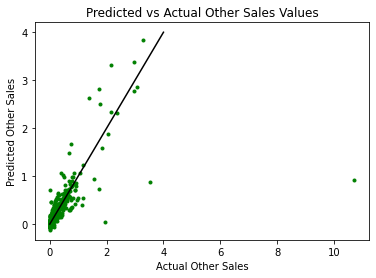

In [93]:
plt.plot(y4_test, y4_pred, '.', color='green')
plt.plot([x for x in range(0,5)],[x for x in range(0,5)], color='black')

plt.title('Predicted vs Actual Other Sales Values')
plt.ylabel('Predicted Other Sales')
plt.xlabel('Actual Other Sales')

In [94]:
r_sq = modelOT.score(X4,y4)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6807626070150355


The R-Squared coefficient tells us that this model explains about 68% variation from the mean. 

In [95]:
print('intercept:', modelOT['linearregression'].intercept_)

intercept: 0.09494085689894881


In [96]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y4_test, y4_pred))

Mean absolute error: 0.05


In [97]:
print('slope:', modelOT['linearregression'].coef_)

slope: [ 2.51986368e-01  5.81406604e-02 -1.25424914e-02  6.54586403e-04
 -1.80503696e-02  2.15862167e+11  1.38324524e+11  1.24990854e+11
  1.51160787e+11  1.30533967e+11  1.19122985e+11  1.54923980e+11
  1.78441874e+11  1.58748249e+11  1.41461588e+11  1.78285295e+11
  1.27295279e+11]


In [99]:
X4_col = ['EU_Sales', 'NA_Sales', 'JP_Sales', 'platforms', 'Years_of_Release',
       'Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']
coef = modelOT['linearregression'].coef_

tuples = list(zip(X4_col, coef))
coef_df = pd.DataFrame(tuples, columns=['Features', 'Coefficients'])
coef_df

,Features,Coefficients
0,EU_Sales,2.519864e-01
1,NA_Sales,5.814066e-02
2,JP_Sales,-1.254249e-02
3,platforms,6.545864e-04
4,Years_of_Release,-1.805037e-02
5,Action,2.158622e+11
6,Adventure,1.383245e+11
7,Fighting,1.249909e+11
8,Misc,1.511608e+11
9,Platform,1.305340e+11


# Multiple Linear Regression Model (OLS)

In [107]:
X5 = sm.add_constant(X1)
X6 = sm.add_constant(X2)
X7 = sm.add_constant(X3)
X8 = sm.add_constant(X4)

## North America Sales 

In [108]:
X5_train, X5_test, y1_train, y1_test = train_test_split(X5, y1, test_size = 0.3, random_state=2)
print(X5_train.shape, y1_train.shape, X5_test.shape, y1_test.shape)

(4367, 18) (4367,) (1872, 18) (1872,)


In [109]:
ols1 = sm.OLS(y1_train, X5_train)
ols1_result = ols1.fit()

In [110]:
ols1_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NA_Sales   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     591.7
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:08:08   Log-Likelihood:                -5599.5
No. Observations:                4367   AIC:                         1.123e+04
Df Residuals:                    4350   BIC:                         1.134e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1331      0.029     -4.606      0.000      -0.190      -0.076
EU_Sales             0.8432      0.029     28.775      0.000       0.786       0.901
JP_Sales             0.5055      0.038     13.269      0.000       0.431       0.580
Other_Sales          1.1214      0.081     13.791      0.000       0.962       1.281
platforms            0.0513      0.007      7.087      0.000       0.037       0.066
Years_of_Release     0.0156      0.002      7.101      0.000       0.011       0.020
Action              -0.0326      0.032     -1.023      0.306      -0.095       0.030
Adventure           -0.1284      0.050     -2.584      0.010      -0.226      -0.031
Fighting             0.0613      0.055      1.112      0.266      -0.047       0.169
Misc                 0.1032      0.045      2.272      0.023       0.014       0.192
Platform             0.1343      0.054      2.505      0.012       0.029       0.239
Puzzle              -0.1082      0.058     -1.876      0.061      -0.221       0.005
Racing              -0.1257      0.045     -2.802      0.005      -0.214      -0.038
Role-Playing        -0.1558      0.039     -4.005      0.000      -0.232      -0.080
Shooter              0.1706      0.044      3.904      0.000       0.085       0.256
Simulation          -0.0768      0.049     -1.581      0.114      -0.172       0.018
Sports               0.1204      0.039      3.105      0.002       0.044       0.196
Strategy            -0.0955      0.054     -1.772      0.076      -0.201       0.010
==============================================================================
Omnibus:                     7077.928   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14605280.080
Skew:                          10.064   Prob(JB):                         0.00
Kurtosis:                     285.599   Cond. No.                     1.09e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.62e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Europe Sales 

In [111]:
X6_train, X6_test, y2_train, y2_test = train_test_split(X6, y2, test_size = 0.3, random_state=2)
print(X6_train.shape, y2_train.shape, X6_test.shape, y2_test.shape)

(4367, 18) (4367,) (1872, 18) (1872,)


In [112]:
ols2 = sm.OLS(y2_train, X6_train)
ols2_result = ols2.fit()
ols2_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               EU_Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1205.
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:08:18   Log-Likelihood:                -2341.7
No. Observations:                4367   AIC:                             4717.
Df Residuals:                    4350   BIC:                             4826.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0159      0.014      1.154      0.249      -0.011       0.043
NA_Sales             0.1896      0.007     28.775      0.000       0.177       0.203
JP_Sales             0.1585      0.018      8.674      0.000       0.123       0.194
Other_Sales          1.7644      0.029     60.997      0.000       1.708       1.821
platforms            0.0109      0.003      3.145      0.002       0.004       0.018
Years_of_Release    -0.0037      0.001     -3.559      0.000      -0.006      -0.002
Action               0.0046      0.015      0.307      0.759      -0.025       0.034
Adventure            0.0363      0.024      1.539      0.124      -0.010       0.083
Fighting            -0.0318      0.026     -1.216      0.224      -0.083       0.019
Misc                -0.0111      0.022     -0.517      0.605      -0.053       0.031
Platform             0.0095      0.025      0.373      0.709      -0.040       0.059
Puzzle               0.0021      0.027      0.076      0.940      -0.052       0.056
Racing               0.0204      0.021      0.959      0.338      -0.021       0.062
Role-Playing        -0.0239      0.018     -1.292      0.196      -0.060       0.012
Shooter              0.0101      0.021      0.486      0.627      -0.031       0.051
Simulation           0.0211      0.023      0.916      0.360      -0.024       0.066
Sports              -0.0513      0.018     -2.789      0.005      -0.087      -0.015
Strategy             0.0299      0.026      1.169      0.242      -0.020       0.080
==============================================================================
Omnibus:                     6247.218   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22636572.137
Skew:                          -7.465   Prob(JB):                         0.00
Kurtosis:                     355.395   Cond. No.                     7.27e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.49e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Japan Sales

In [113]:
X7_train, X7_test, y3_train, y3_test = train_test_split(X7, y3, test_size = 0.3, random_state=2)
print(X7_train.shape, y3_train.shape, X7_test.shape, y3_test.shape)

(4367, 18) (4367,) (1872, 18) (1872,)


In [114]:
ols3 = sm.OLS(y3_train, X7_train)
ols3_result = ols3.fit()
ols3_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               JP_Sales   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     82.83
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          1.07e-236
Time:                        16:08:20   Log-Likelihood:                -1489.1
No. Observations:                4367   AIC:                             3012.
Df Residuals:                    4350   BIC:                             3121.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0203      0.011     -1.800      0.072      -0.042       0.002
EU_Sales             0.1073      0.012      8.674      0.000       0.083       0.132
NA_Sales             0.0769      0.006     13.269      0.000       0.066       0.088
Other_Sales         -0.1475      0.032     -4.563      0.000      -0.211      -0.084
platforms           -0.0059      0.003     -2.089      0.037      -0.012      -0.000
Years_of_Release     0.0076      0.001      8.880      0.000       0.006       0.009
Action              -0.0285      0.012     -2.299      0.022      -0.053      -0.004
Adventure           -0.0207      0.019     -1.065      0.287      -0.059       0.017
Fighting            -0.0101      0.022     -0.470      0.638      -0.052       0.032
Misc                -0.0444      0.018     -2.502      0.012      -0.079      -0.010
Platform             0.1102      0.021      5.283      0.000       0.069       0.151
Puzzle               0.0472      0.023      2.096      0.036       0.003       0.091
Racing              -0.0407      0.018     -2.326      0.020      -0.075      -0.006
Role-Playing         0.1678      0.015     11.192      0.000       0.138       0.197
Shooter             -0.1030      0.017     -6.056      0.000      -0.136      -0.070
Simulation           0.0203      0.019      1.070      0.285      -0.017       0.057
Sports              -0.0766      0.015     -5.069      0.000      -0.106      -0.047
Strategy            -0.0418      0.021     -1.987      0.047      -0.083      -0.001
==============================================================================
Omnibus:                     5283.206   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           814656.940
Skew:                           6.394   Prob(JB):                         0.00
Kurtosis:                      68.678   Cond. No.                     4.42e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.03e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Other Sales

In [115]:
X8_train, X8_test, y4_train, y4_test = train_test_split(X8, y4, test_size = 0.3, random_state=2)
print(X8_train.shape, y4_train.shape, X8_test.shape, y4_test.shape)

(4367, 18) (4367,) (1872, 18) (1872,)


In [116]:
ols4 = sm.OLS(y4_train, X8_train)
ols4_result = ols4.fit()
ols4_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Other_Sales   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     953.3
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:08:34   Log-Likelihood:                 1828.6
No. Observations:                4367   AIC:                            -3623.
Df Residuals:                    4350   BIC:                            -3515.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0297      0.005      5.633      0.000       0.019       0.040
EU_Sales             0.2613      0.004     60.997      0.000       0.253       0.270
NA_Sales             0.0374      0.003     13.791      0.000       0.032       0.043
JP_Sales            -0.0323      0.007     -4.563      0.000      -0.046      -0.018
platforms            0.0004      0.001      0.272      0.786      -0.002       0.003
Years_of_Release    -0.0028      0.000     -7.059      0.000      -0.004      -0.002
Action               0.0096      0.006      1.655      0.098      -0.002       0.021
Adventure           -0.0129      0.009     -1.423      0.155      -0.031       0.005
Fighting             0.0106      0.010      1.053      0.293      -0.009       0.030
Misc                 0.0033      0.008      0.396      0.692      -0.013       0.020
Platform            -0.0256      0.010     -2.614      0.009      -0.045      -0.006
Puzzle              -0.0047      0.011     -0.448      0.654      -0.025       0.016
Racing               0.0261      0.008      3.194      0.001       0.010       0.042
Role-Playing         0.0085      0.007      1.192      0.233      -0.005       0.022
Shooter              0.0022      0.008      0.281      0.778      -0.013       0.018
Simulation          -0.0051      0.009     -0.572      0.568      -0.022       0.012
Sports               0.0264      0.007      3.730      0.000       0.013       0.040
Strategy            -0.0088      0.010     -0.893      0.372      -0.028       0.011
==============================================================================
Omnibus:                    10706.387   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        227365702.500
Skew:                          25.381   Prob(JB):                         0.00
Kurtosis:                    1119.679   Cond. No.                     1.06e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.06e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Analysis

The OLS models have higher R-Squared coefficients than the normal multiple linear regression models for all regions besides Japan. The resulting R-squared values for the best model for each region are:

North America : 0.685,
Europe : 0.816,
Japan : 0.239,
Other : 0.778

As expected, Japan's model has low accuracy. During the exploratory data analysis portion of the project, it was evident that Japan's trends were very different from that of all the other regions. To improve on a model to more accurately predict Japan's video game sales, we would need a different approach with more data specific to Japan.